In [67]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
warnings.filterwarnings('ignore')

In [48]:
paths = []
labels = []

# Replace this with the path to your data source
data_source_path = r'C:\Users\Admin\Desktop\TASK_1\Data\TESS Toronto emotional speech set data'

for dirname, _, filenames in os.walk(data_source_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break

print('DATASET HAS BEEN LOADED')


DATASET HAS BEEN LOADED


In [49]:
# Gives you the count of file paths collected in the paths list based on the loop's termination condition.
print("Count = ",len(paths))

Count =  2800


In [88]:
paths[:15]

['C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_beg_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bite_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_boat_angry.wav',
 'C:\\Users\\Admin\\Desktop\\TASK_1\\Data\\TESS Toronto emotional speech set data\

In [89]:
labels[:15]


['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry']

In [90]:
## Create a dataframe
df = pd.DataFrame()
df['SPEECH'] = paths
df['LABEL'] = labels
df.head(15)

# df.head() statement shows the first five rows of this DataFrame.

,SPEECH,LABEL
0,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
1,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
2,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
3,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
4,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
5,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
6,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
7,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
8,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry
9,C:\Users\Admin\Desktop\TASK_1\Data\TESS Toront...,angry


In [91]:
df['LABEL'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: LABEL, dtype: int64

In [92]:
def spectogram(data, sr, emotion):
 x = librosa.stft(data)
 xdb = librosa.amplitude_to_db(abs(x))
 plt.figure(figsize=(11,4))
 plt.title(emotion, size=20)
 librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
 plt.colorbar()


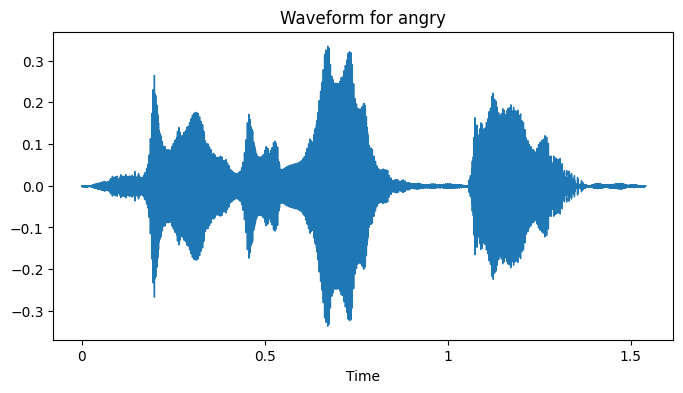

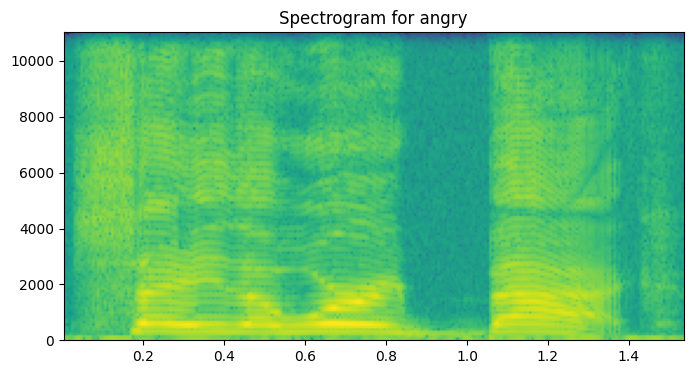

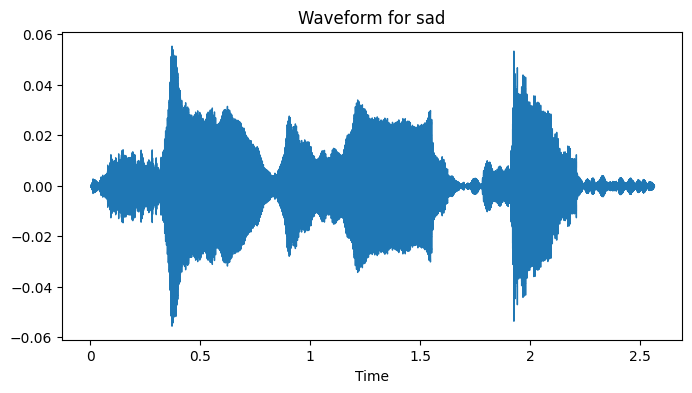

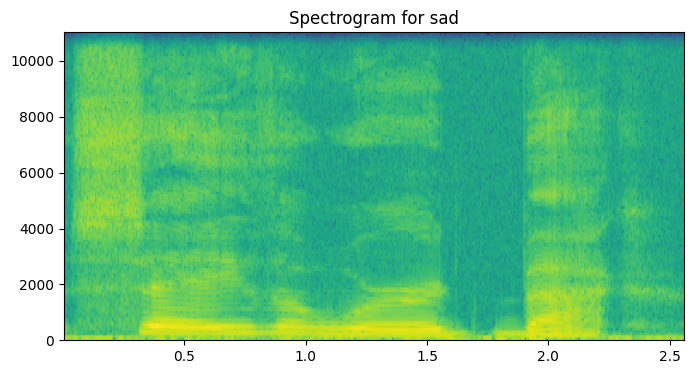

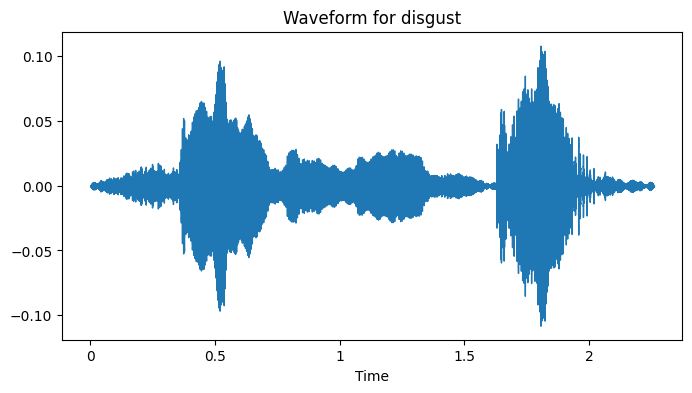

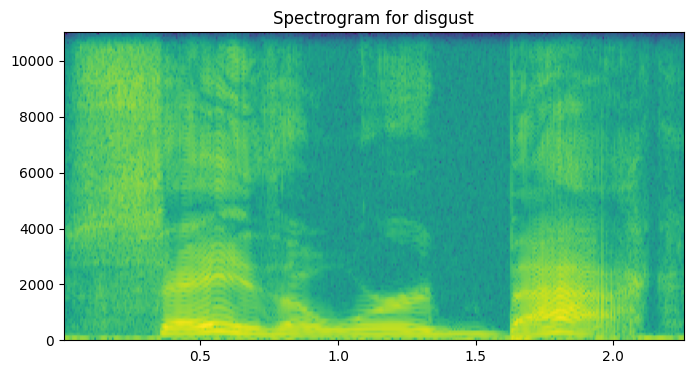

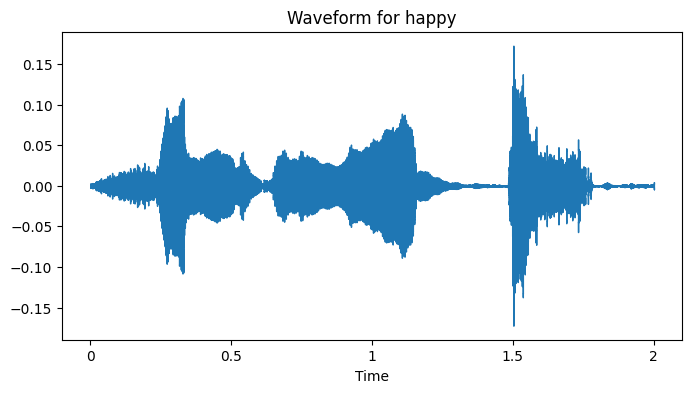

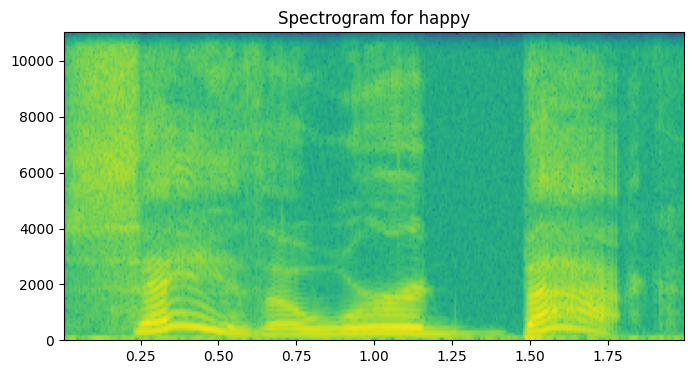

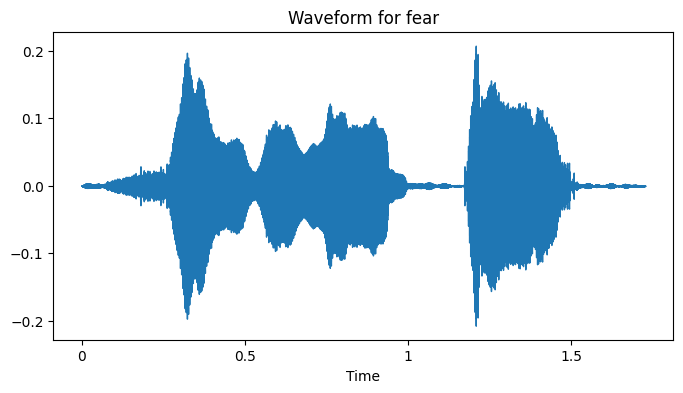

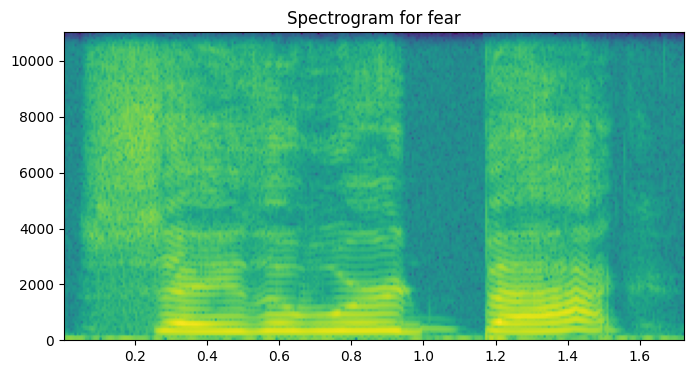

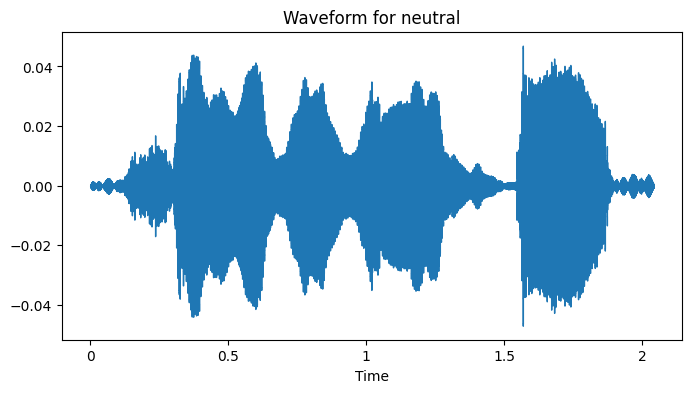

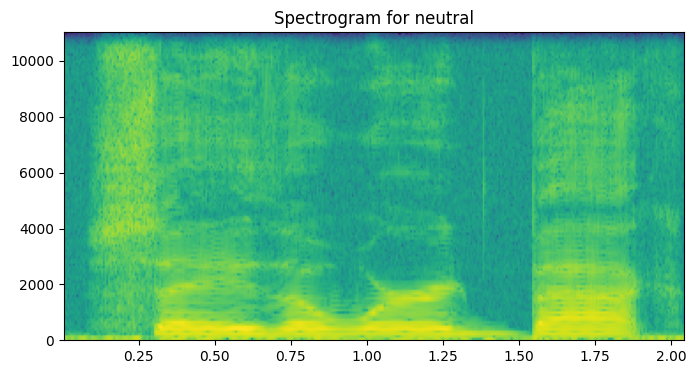

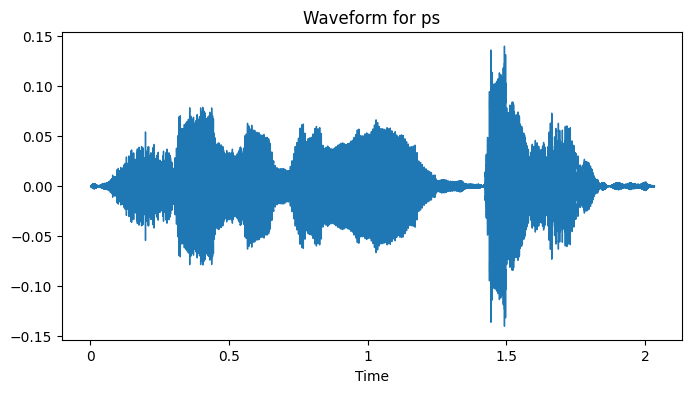

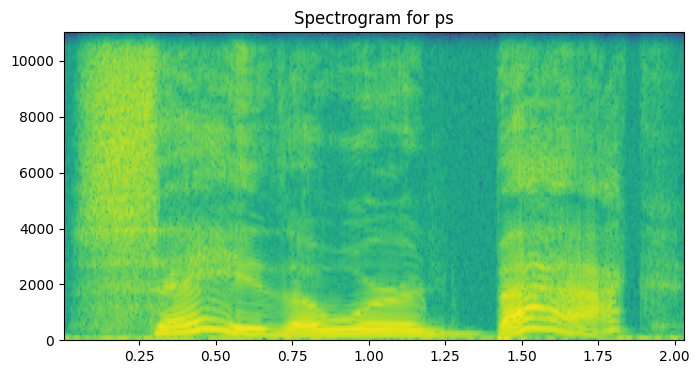

In [94]:
# Define a list of emotions
emotions = ['angry', 'sad', 'disgust', 'happy', 'fear', 'neutral', 'ps']

# Loop through each emotion
for emotion in emotions:
    path = np.array(df['SPEECH'][df['LABEL'] == emotion])[0]
    data, sampling_rate = librosa.load(path)
    
    # Plot the waveplot
    plt.figure(figsize=(8, 4))
    plt.title(f'Waveform for {emotion}')
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.savefig(f'waveform_{emotion}.png')
    plt.show()
    
    # Plot the spectrogram
    plt.figure(figsize=(8, 4))
    plt.title(f'Spectrogram for {emotion}')
    plt.specgram(data, Fs=sampling_rate)
    plt.savefig(f'spectrogram_{emotion}.png')
    plt.show()
    
   
    # Play the audio
    display(Audio(path))


In [57]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [58]:
extract_mfcc(df['SPEECH'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275578e+00,  1.00753632e+01, -2.03667068e+01, -6.09245014e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255363e+00,  2.02101767e-01,
        7.27550745e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115932e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722819e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649104e+00],
      dtype=float32)

In [60]:
X_mfcc = df['SPEECH'].apply(lambda x: extract_mfcc(x))

In [61]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.124, 1.5550473, -0.21709493, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014447, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572518, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261614, ...
Name: SPEECH, Length: 2800, dtype: object

In [62]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [63]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [64]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['LABEL']])

In [65]:
#This line converts a potentially sparse matrix y into a dense 
#NumPy array, preserving all values instead of just the non-zero ones.

y = y.toarray()
y.shape

(2800, 7)

In [68]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [69]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 8s 143ms/step - loss: 1.0834 - accuracy: 0.6080 - val_loss: 1.1765 - val_accuracy: 0.3554
Epoch 2/50
35/35 [==============================] - 4s 123ms/step - loss: 0.4410 - accuracy: 0.8487 - val_loss: 0.5226 - val_accuracy: 0.8161
Epoch 3/50
35/35 [==============================] - 5s 132ms/step - loss: 0.1974 - accuracy: 0.9402 - val_loss: 0.1575 - val_accuracy: 0.9482
Epoch 4/50
35/35 [==============================] - 5s 132ms/step - loss: 0.1344 - accuracy: 0.9634 - val_loss: 0.0709 - val_accuracy: 0.9786
Epoch 5/50
35/35 [==============================] - 4s 125ms/step - loss: 0.1141 - accuracy: 0.9674 - val_loss: 0.0757 - val_accuracy: 0.9768
Epoch 6/50
35/35 [==============================] - 5s 131ms/step - loss: 0.0990 - accuracy: 0.9705 - val_loss: 0.0470 - val_accuracy: 0.9821
Epoch 7/50
35/35 [==============================] - 5s 132ms/step - loss: 0.0849 - accuracy: 0.9799 - val_loss: 0.0829 - val_accuracy: 0.9696
Epoch 

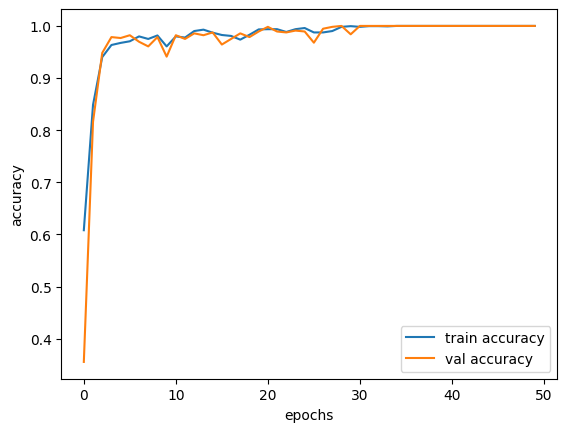

In [70]:
# A Line Graph of Training accuracy and validation accuracy

epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

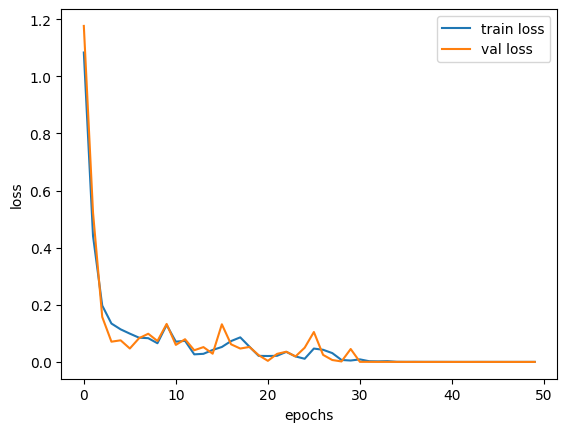

In [71]:
# A Line Graph of Training loss and validation loss 

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [72]:
# Save the model to a file
model.save('my_model.h5')
# You can save it with any name but should end with .h5

In [73]:
# Load the trained model
model = load_model('my_model.h5')

In [74]:
def preprocess_audio(audio_path):
    mfcc = extract_mfcc(audio_path) 
    mfcc = np.expand_dims(mfcc, axis=0)
    return mfcc


In [75]:
def predict_emotion(audio_path):
    # Preprocess the audio
    audio_features = preprocess_audio(audio_path)

    # Making a prediction
    emotion_probabilities = model.predict(audio_features)

    # Getting the emotion label with the highest probability
    emotion_label = enc.inverse_transform(emotion_probabilities)[0]

    return emotion_label


ENTER THE LOCAL AUDIO PATH : C:\Users\Admin\Desktop\TASK_1\Data\TESS Toronto emotional speech set data\OAF_Fear\OAF_base_fear.wav
1/1 [==============================] - 0s 24ms/step
PREDICTED EMOTION: ['fear']


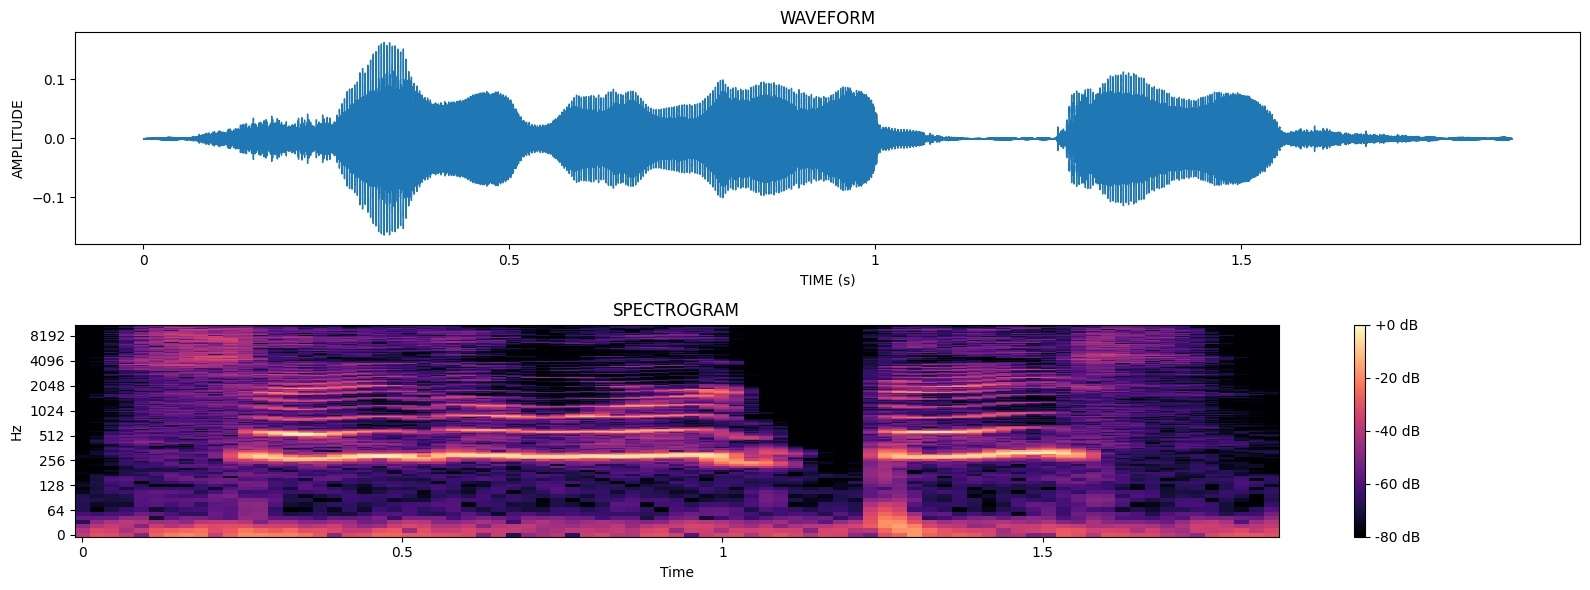

In [81]:
# Audio emotion prediction
audio_path = input("ENTER THE LOCAL AUDIO PATH : ")
predicted_emotion = predict_emotion(audio_path)
print(f'PREDICTED EMOTION: {predicted_emotion}')

# Load the audio to get the waveform and the spectrogram
audio, sr = librosa.load(audio_path)

# To Play the audio from the local audio path
display(Audio(audio, rate=sr))

# Creating subplots for waveform and spectrogram
plt.figure(figsize=(16, 6))

# Waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title("WAVEFORM")
plt.xlabel("TIME (s)")
plt.ylabel("AMPLITUDE")

# Spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("SPECTROGRAM")    

plt.tight_layout()